# Importing


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
from sklearn.model_selection import train_test_split

# Mounting

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read dataset

In [33]:
url = '/content/drive/My Drive/Colab Notebooks/datasets/text_dataset.csv'

In [34]:
df = pd.read_csv(url)
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [35]:
texts = df['Text']
sentiments = df['Sentiment']
print(texts.head())
print(sentiments.head())

0    Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1    user: AAP MOVIE. 55% return for the FEA/GEED i...
2    user I'd be afraid to short AMZN - they are lo...
3                                    MNTA Over 12.00  
4                                     OI  Over 21.37  
Name: Text, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: Sentiment, dtype: int64


In [36]:
sentiments = np.array(sentiments)
sentiments[sentiments < 0] = 0

# Pre-processing

In [37]:
import nltk
from nltk import corpus

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
 
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

word_tokens = []

for i in texts:
  word_tokens.append(word_tokenize(i))

# stopwords filtering
stopwords_filtered_texts = []
for t in word_tokens:
    filtered_sentence = []
    for w in t:
      if w not in stop_words:
        filtered_sentence.append(w)
    stopwords_filtered_texts.append(filtered_sentence)

print(word_tokens[2])
print(stopwords_filtered_texts[2])

# stemming
stemmed_texts = []
for t in stopwords_filtered_texts:
  filtered_sent = []
  for w in t:
    filtered_sent.append(ps.stem(w))
  stemmed_texts.append(filtered_sent)

print(stemmed_texts[2])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['user', 'I', "'d", 'be', 'afraid', 'to', 'short', 'AMZN', '-', 'they', 'are', 'looking', 'like', 'a', 'near-monopoly', 'in', 'eBooks', 'and', 'infrastructure-as-a-service']
['user', 'I', "'d", 'afraid', 'short', 'AMZN', '-', 'looking', 'like', 'near-monopoly', 'eBooks', 'infrastructure-as-a-service']
['user', 'I', "'d", 'afraid', 'short', 'amzn', '-', 'look', 'like', 'near-monopoli', 'ebook', 'infrastructure-as-a-servic']


# BoW (Neural Network)

In [38]:
import heapq

word_count = {}
for t in stemmed_texts:
  for w in t:
    if w not in word_count.keys():
      word_count[w] = 1
    else:
      word_count[w] += 1
len(word_count)

freq_words = heapq.nlargest(100, word_count, key=word_count.get)  # first parameter holo amra koto word chai
freq_words[:4]

BoW = []
for t in stemmed_texts:
    vector = []
    for w in freq_words:
        if w in t:
            vector.append(1)
        else:
            vector.append(0)
    BoW.append(vector)
BoW = np.asarray(BoW)
print(BoW[:2])


[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [39]:
x_train, x_test, y_train, y_test = train_test_split(BoW, sentiments, test_size=0.2, random_state=39)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)


(4632, 100)
(1159, 100)
(4632,)


In [44]:
nn = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, )),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

adam = keras.optimizers.Adam(learning_rate=0.01)
nn.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

nn_history = nn.fit(x_train, y_train, epochs=10, batch_size=39)

Epoch 1/10
119/119 [==============================] - 1s 6ms/step - loss: 0.5770 - accuracy: 0.7032
Epoch 2/10
119/119 [==============================] - 1s 5ms/step - loss: 0.5177 - accuracy: 0.7411
Epoch 3/10
119/119 [==============================] - 1s 4ms/step - loss: 0.4781 - accuracy: 0.7591
Epoch 4/10
119/119 [==============================] - 1s 6ms/step - loss: 0.4372 - accuracy: 0.7843
Epoch 5/10
119/119 [==============================] - 1s 5ms/step - loss: 0.3816 - accuracy: 0.8083
Epoch 6/10
119/119 [==============================] - 1s 5ms/step - loss: 0.3299 - accuracy: 0.8351
Epoch 7/10
119/119 [==============================] - 1s 5ms/step - loss: 0.2962 - accuracy: 0.8586
Epoch 8/10
119/119 [==============================] - 0s 3ms/step - loss: 0.2666 - accuracy: 0.8713
Epoch 9/10
119/119 [==============================] - 0s 3ms/step - loss: 0.2556 - accuracy: 0.8845
Epoch 10/10
119/119 [==============================] - 0s 3ms/step - loss: 0.2411 - accuracy: 0.8880

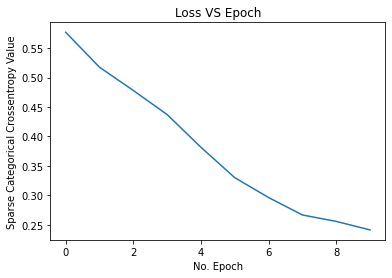

In [45]:
plt.plot(nn_history.history['loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Sparse Categorical Crossentropy Value')
plt.xlabel('No. Epoch')
plt.show()

In [47]:
nn.evaluate(x_test, y_test)

37/37 [==============================] - 0s 2ms/step - loss: 0.9210 - accuracy: 0.7118


[0.9209537506103516, 0.7118205428123474]

In [50]:
from sklearn import metrics
y_predict = nn.predict(x_test)
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

print(metrics.classification_report(y_test, y_predict_labels))
print ('Accuracy: ', metrics.accuracy_score(y_test, y_predict_labels))
print ('Precision: ', metrics.precision_score(y_test, y_predict_labels, average='macro'))
print ('Recall: ', metrics.recall_score(y_test, y_predict_labels, average='macro'))
print ('F1-score: ', metrics.f1_score(y_test, y_predict_labels, average='macro'))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54       427
           1       0.73      0.86      0.79       732

    accuracy                           0.71      1159
   macro avg       0.69      0.66      0.67      1159
weighted avg       0.70      0.71      0.70      1159

Accuracy:  0.7118205349439172
Precision:  0.6932098908843094
Recall:  0.6596409055425448
F1-score:  0.665572949063515


# TF-IDF (Neural Network)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer(stemmed_texts[])


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


array([[list(['kicker', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'AJ', 'trade', 'method', '1', 'method', '2', ',', 'see', 'prev', 'post']),
        list(['user', ':', 'aap', 'movi', '.', '55', '%', 'return', 'fea/ge', 'indic', '15', 'trade', 'year', '.', 'awesom', '.']),
        list(['user', 'I', "'d", 'afraid', 'short', 'amzn', '-', 'look', 'like', 'near-monopoli', 'ebook', 'infrastructure-as-a-servic']),
        ...,
        list(['worker', 'bajaj', 'auto', 'agre', '10', '%', 'wage', 'cut', 'period', 'april', '15', 'till', 'lockdown', 'lift', '.', 'http', ':', '//t.co/rgvrkplind']),
        list(['#', 'sharemarket', 'live', ':', 'sensex', 'day', '’', 'high', ',', '600', 'point', ',', '#', 'nifti', 'test', '9,200', ',', '#', 'tc', ',', 'privat', 'bank', 'stock', 'lead', 'http', ':', '//t.co/3xgtlrokui']),
        list(['#', 'sensex', ',', '#', 'nifti', 'climb', 'day', "'s", 'high', ',', 'still', '2', '%', ';', 'key', 'factor', 'drive', 'd-street', 'higher', 'today', 'h

# One-Hot Embedding (CNN)

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


array([array(['kicker', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz',
              'AJ', 'trade', 'method', '1', 'method', '2', ',', 'see', 'prev',
              'post'], dtype='<U9')                                            ,
       array(['user', ':', 'aap', 'movi', '.', '55', '%', 'return', 'fea/ge',
              'indic', '15', 'trade', 'year', '.', 'awesom', '.'], dtype='<U6'),
       array(['user', 'I', "'d", 'afraid', 'short', 'amzn', '-', 'look', 'like',
              'near-monopoli', 'ebook', 'infrastructure-as-a-servic'],
             dtype='<U26')                                                      ,
       ...,
       array(['worker', 'bajaj', 'auto', 'agre', '10', '%', 'wage', 'cut',
              'period', 'april', '15', 'till', 'lockdown', 'lift', '.', 'http',
              ':', '//t.co/rgvrkplind'], dtype='<U17')                         ,
       array(['#', 'sharemarket', 'live', ':', 'sensex', 'day', '’', 'high', ',',
              '600', 'point', ',', '#